In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [154]:
df=pd.read_csv(r"C:\Users\Tejas\Desktop\Oasis Infobyte\House Price Prediction\Housing.csv")

In [155]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [157]:
df.shape

(545, 13)

In [158]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [159]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [160]:
df.isnull().sum() # we can see there is no null values found in data

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [161]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [162]:
#droping irrelavent values which will make no significance in the analysis
df = df.drop(['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'], axis=1)

In [163]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


###  Exploratory Data analysis

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'parking'}>]], dtype=object)

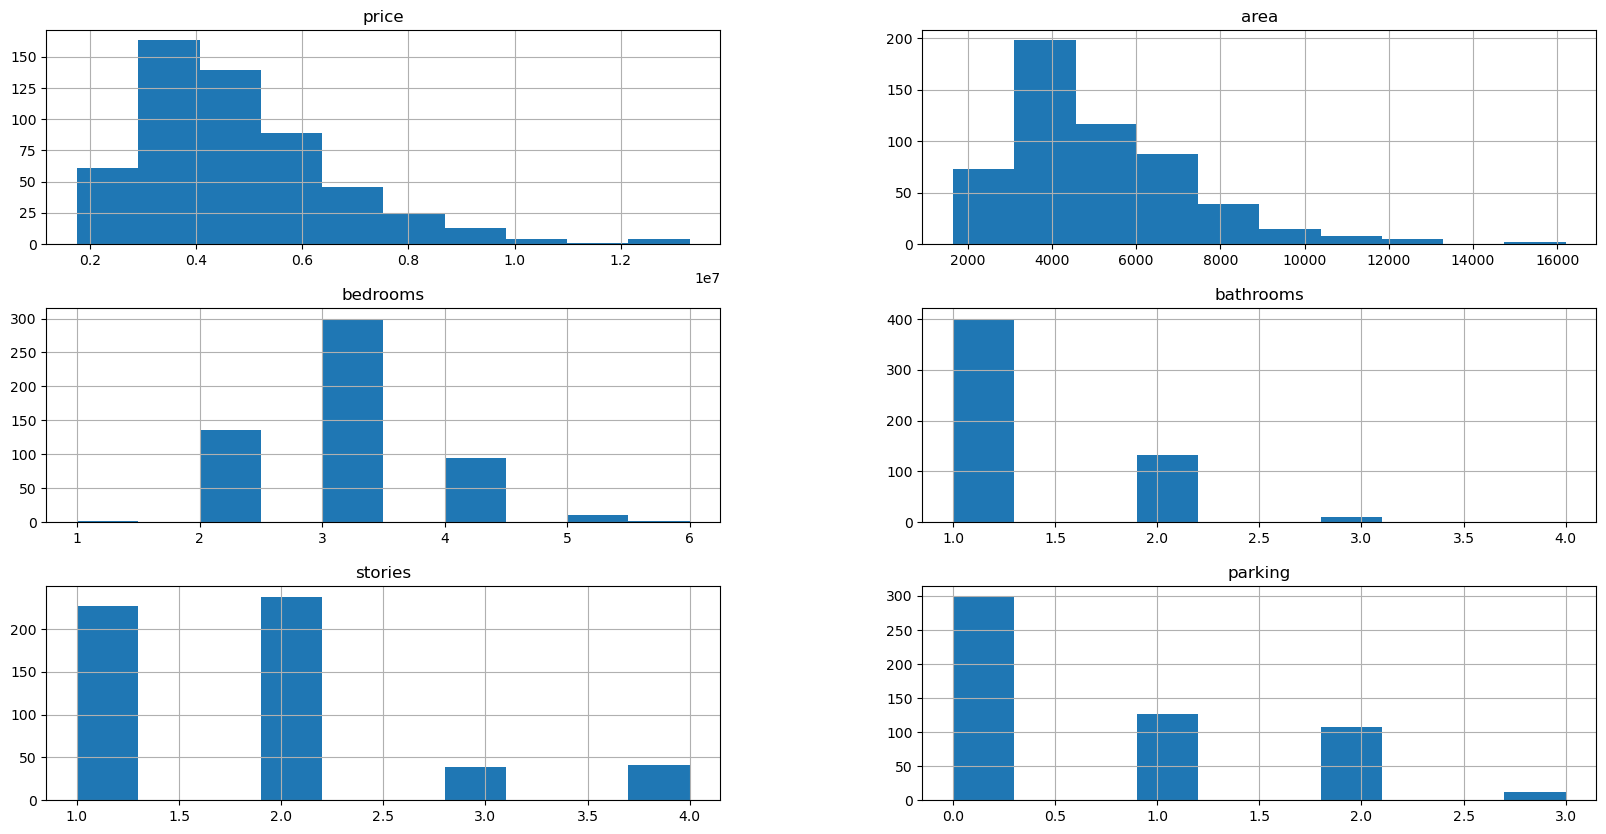

In [164]:
df.hist(figsize=(20,10))

In [165]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


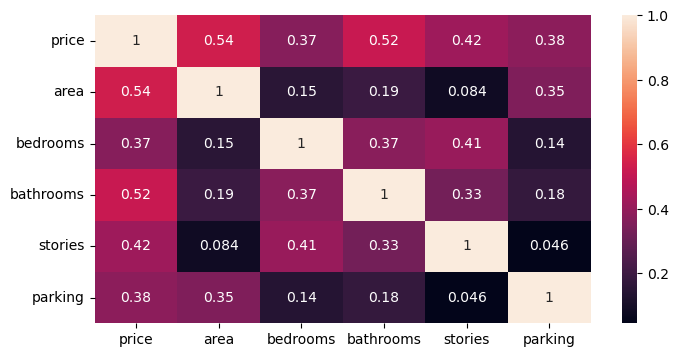

In [166]:
plt.figure(figsize = (8,4))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Outlier Treatment

Lower bound: -35000.0
Upper bound: 9205000.0


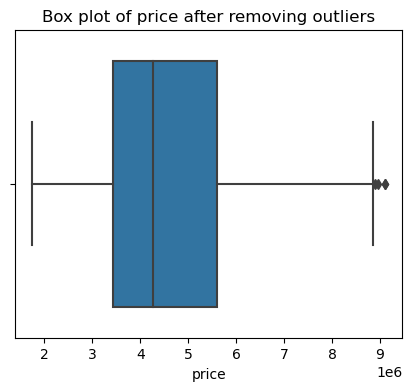

Original DataFrame shape: (545, 6)
DataFrame shape after removing outliers: (530, 6)
before removing outliers :  545
after removing outliers :  530
Outliers:  15
Lower bound: -540.0
Upper bound: 10500.0


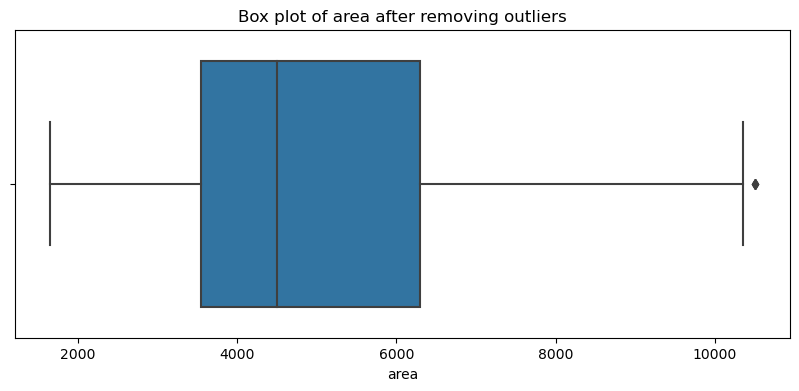

Original DataFrame shape: (545, 6)
DataFrame shape after removing outliers: (533, 6)
before removing outliers :  545
after removing outliers :  530
Outliers:  15
Lower bound: 0.5
Upper bound: 4.5


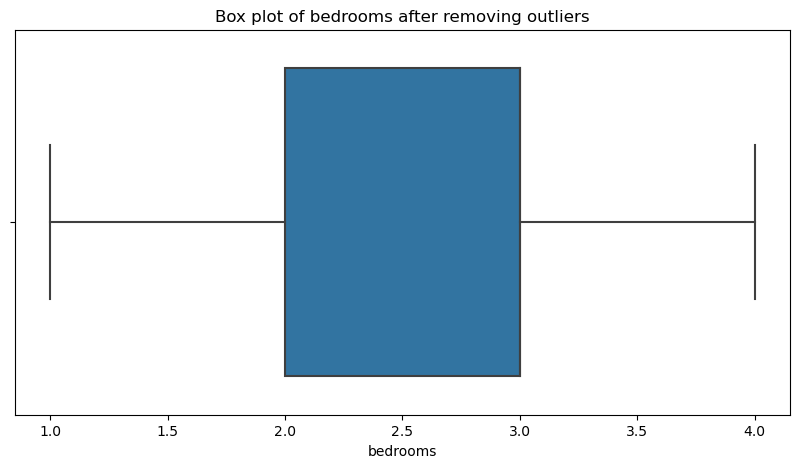

Original DataFrame shape: (545, 6)
DataFrame shape after removing outliers: (533, 6)
before removing outliers :  545
after removing outliers :  533
Outliers:  12
Lower bound: -0.5
Upper bound: 3.5


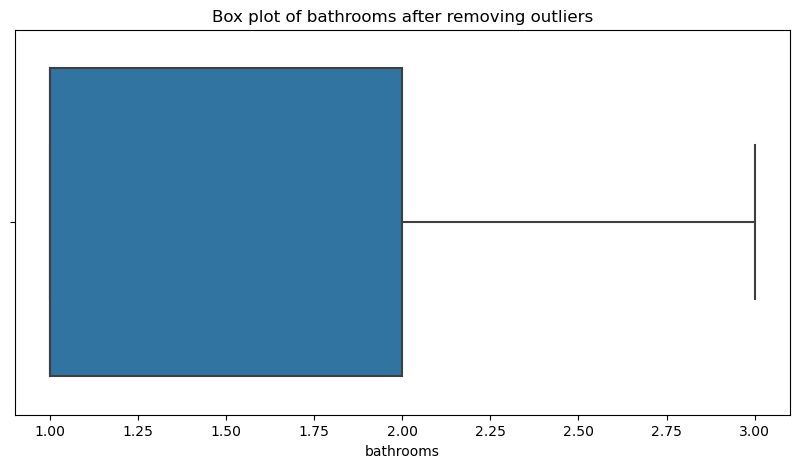

Original DataFrame shape: (545, 6)
DataFrame shape after removing outliers: (544, 6)
before removing outliers :  545
after removing outliers :  544
Outliers:  1
Lower bound: -0.5
Upper bound: 3.5


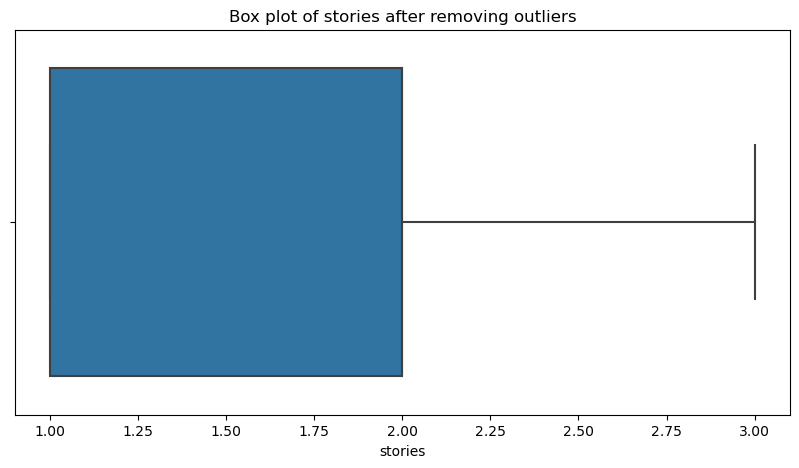

Original DataFrame shape: (545, 6)
DataFrame shape after removing outliers: (504, 6)
before removing outliers :  545
after removing outliers :  504
Outliers:  41
Lower bound: -1.5
Upper bound: 2.5


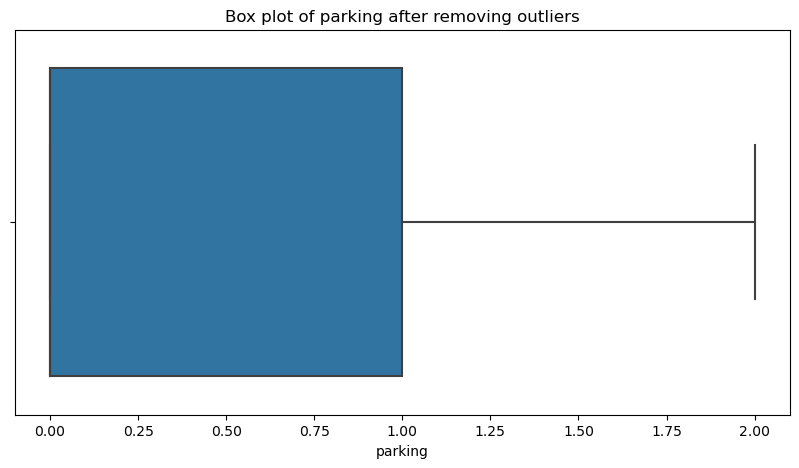

Original DataFrame shape: (545, 6)
DataFrame shape after removing outliers: (533, 6)
before removing outliers :  545
after removing outliers :  533
Outliers:  12


In [167]:
# for 'price'
# Identify outliers using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')

# Filter out outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Verify by plotting the box plot again
plt.figure(figsize=(5,4))
sns.boxplot(x=df_no_outliers['price'])
plt.title('Box plot of price after removing outliers')
plt.show()

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

#trimming the data
new_df=df.loc[(df['price']<upper_bound) & (df['price']>lower_bound)]
print("before removing outliers : ",len(df))
print("after removing outliers : ",len(new_df))
print("Outliers: ", len(df)-len(new_df))




# for 'area'
# Identify outliers using IQR method
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')

# Filter out outliers
df_no_outliers = df[(df['area'] >= lower_bound) & (df['area'] <= upper_bound)]

# Verify by plotting the box plot again
plt.figure(figsize=(10,4))
sns.boxplot(x=df_no_outliers['area'])
plt.title('Box plot of area after removing outliers')
plt.show()

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

#trimming the data
new_df=df.loc[(df['area']<upper_bound) & (df['area']>lower_bound)]
print("before removing outliers : ",len(df))
print("after removing outliers : ",len(new_df))
print("Outliers: ", len(df)-len(new_df))




# for 'bedrooms'
# Identify outliers using IQR method
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')

# Filter out outliers
df_no_outliers = df[(df['bedrooms'] >= lower_bound) & (df['bedrooms'] <= upper_bound)]

# Verify by plotting the box plot again
plt.figure(figsize=(10,5))
sns.boxplot(x=df_no_outliers['bedrooms'])
plt.title('Box plot of bedrooms after removing outliers')
plt.show()

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

#trimming the data
new_df=df.loc[(df['bedrooms']<upper_bound) & (df['bedrooms']>lower_bound)]
print("before removing outliers : ",len(df))
print("after removing outliers : ",len(new_df))
print("Outliers: ", len(df)-len(new_df))



# for 'bathrooms'
# Identify outliers using IQR method
Q1 = df['bathrooms'].quantile(0.25)
Q3 = df['bathrooms'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')

# Filter out outliers
df_no_outliers = df[(df['bathrooms'] >= lower_bound) & (df['bathrooms'] <= upper_bound)]

# Verify by plotting the box plot again
plt.figure(figsize=(10,5))
sns.boxplot(x=df_no_outliers['bathrooms'])
plt.title('Box plot of bathrooms after removing outliers')
plt.show()

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

#trimming the data
new_df=df.loc[(df['bathrooms']<upper_bound) & (df['bathrooms']>lower_bound)]
print("before removing outliers : ",len(df))
print("after removing outliers : ",len(new_df))
print("Outliers: ", len(df)-len(new_df))



# for 'stories'
# Identify outliers using IQR method
Q1 = df['stories'].quantile(0.25)
Q3 = df['stories'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')

# Filter out outliers
df_no_outliers = df[(df['stories'] >= lower_bound) & (df['stories'] <= upper_bound)]

# Verify by plotting the box plot again
plt.figure(figsize=(10,5))
sns.boxplot(x=df_no_outliers['stories'])
plt.title('Box plot of stories after removing outliers')
plt.show()

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

#trimming the data
new_df=df.loc[(df['stories']<upper_bound) & (df['stories']>lower_bound)]
print("before removing outliers : ",len(df))
print("after removing outliers : ",len(new_df))
print("Outliers: ", len(df)-len(new_df))




# for 'parking'
# Identify outliers using IQR method
Q1 = df['parking'].quantile(0.25)
Q3 = df['parking'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')

# Filter out outliers
df_no_outliers = df[(df['parking'] >= lower_bound) & (df['parking'] <= upper_bound)]

# Verify by plotting the box plot again
plt.figure(figsize=(10,5))
sns.boxplot(x=df_no_outliers['parking'])
plt.title('Box plot of parking after removing outliers')
plt.show()

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

#trimming the data
new_df=df.loc[(df['parking']<upper_bound) & (df['parking']>lower_bound)]
print("before removing outliers : ",len(df))
print("after removing outliers : ",len(new_df))
print("Outliers: ", len(df)-len(new_df))



## Creating feature for our model

In [168]:
X=new_df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']] 

y=new_df['price'] #target variable 

print(X)
print(y)

#creating training and testing dataset


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2) #train size will be 80% and test size be 20%

     area  bedrooms  bathrooms  stories  parking
0    7420         4          2        3        2
2    9960         3          2        2        2
4    7420         4          1        2        2
5    7500         3          3        1        2
6    8580         4          3        4        2
..    ...       ...        ...      ...      ...
540  3000         2          1        1        2
541  2400         3          1        1        0
542  3620         2          1        1        0
543  2910         3          1        1        0
544  3850         3          1        2        0

[533 rows x 5 columns]
0      13300000
2      12250000
4      11410000
5      10850000
6      10150000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 533, dtype: int64


### Loading Linear Regression Model

In [170]:
lm=LinearRegression() #creating a variable lm to store Linear Regression

In [171]:
#fitting the model inside lm

lm.fit(X_train,y_train)   #training Linear Regression model

LinearRegression()

In [172]:
#accuracy on prediction on training data

training_data_prediction=lm.predict(X_train)

In [173]:
#R score error

score_1=metrics.r2_score(y_train,training_data_prediction)

In [174]:
print("R score error : ",score_1)

R score error :  0.5762653214431874


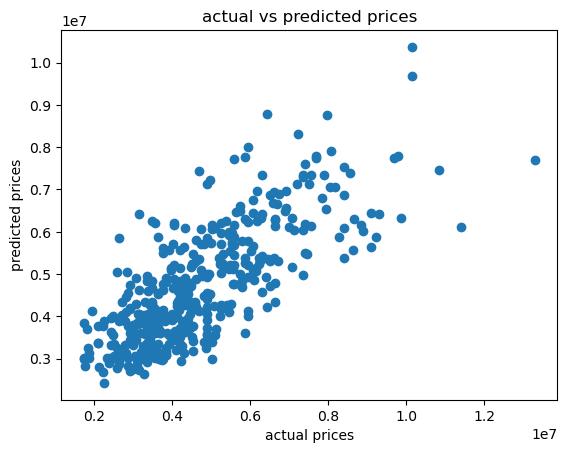

In [175]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual vs predicted prices")
plt.show()

In [178]:
print(summary)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              1783.
Date:                Fri, 31 May 2024   Prob (F-statistic):                        0.00
Time:                        12:11:53   Log-Likelihood:                         -8217.8
No. Observations:                 533   AIC:                                  1.645e+04
Df Residuals:                     528   BIC:                                  1.647e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [134]:
print(summary)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              1783.
Date:                Fri, 31 May 2024   Prob (F-statistic):                        0.00
Time:                        12:11:53   Log-Likelihood:                         -8217.8
No. Observations:                 533   AIC:                                  1.645e+04
Df Residuals:                     528   BIC:                                  1.647e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------